In [1]:
from ue.uexp.dataprocessing.processor_binance import BinanceProcessor
from ue.uexp.dataprocessing.func import *
from ue.uexp.dataprocessing.ta import *
from ue.uexp.models.util import *

#======TA==============
from ta.momentum import *
from ta.trend import *
from ta.volatility import *
from ta.wrapper import *
import ta
#=========================
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20, 10)

import warnings
warnings.filterwarnings('ignore')

In [2]:
### get data (set config params)
ticker_list = ["BTCUSDT"]
start_date = "2022-02-04"
end_date = "2022-02-05"
time_interval = "1s"

p = BinanceProcessor("binance")
df = p.download_data(ticker_list, start_date, end_date, time_interval)

Found 1 symbols
[1/1] - start download daily BTCUSDT aggTrades 

file already exists! ./cache/tick_raw/BTCUSDT-aggTrades-2022-02-03.csv

file already exists! ./cache/tick_raw/BTCUSDT-aggTrades-2022-02-04.csv

File Download: ./cache/tick_raw/BTCUSDT-aggTrades-2022-02-05.zip


In [5]:
df.drop(["tic"], axis=1, inplace=True)
df.columns = ["Open","High","Low","Close","Volume"]

In [6]:
window = 30 # a choice
# df[f"roc_{window}"] = ta.momentum.ROCIndicator(close=df["Close"], window=window).roc()

# TSI Indicator
df["momentum_tsi"] = TSIIndicator(
    close=df["Close"], window_slow=25, window_fast=13, fillna=True
).tsi()/100 #scale 0-1

In [7]:
def stationize(series):
    return np.log(series / series.shift(1))

In [8]:
df['log_ret'] = stationize(df['Close'])

In [9]:
df.drop(["Open","High","Low", "Volume"], axis=1, inplace=True)

In [10]:
HORIZON = 1
WINDOW = 30

In [11]:
# Add windowed columns
for i in range(WINDOW-1): # Shift values for each step in WINDOW_SIZE
  df[f"log_ret+{i+2}"] = df["log_ret"].shift(periods=i+2)
df.head(50)

,Close,momentum_tsi,log_ret,log_ret+2,log_ret+3,log_ret+4,log_ret+5,log_ret+6,log_ret+7,log_ret+8,...,log_ret+21,log_ret+22,log_ret+23,log_ret+24,log_ret+25,log_ret+26,log_ret+27,log_ret+28,log_ret+29,log_ret+30
2022-02-04 00:00:00,37302.85,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 00:00:01,37297.07,-1.000000,-1.549600e-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 00:00:02,37297.07,-1.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 00:00:03,37303.42,-0.975400,1.702402e-04,-1.549600e-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 00:00:04,37303.42,-0.955448,0.000000e+00,0.000000e+00,-1.549600e-04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 00:00:05,37301.26,-0.939247,-5.790521e-05,1.702402e-04,0.000000e+00,-1.549600e-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 00:00:06,37303.14,-0.918331,5.039917e-05,0.000000e+00,1.702402e-04,0.000000e+00,-1.549600e-04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 00:00:07,37303.31,-0.900166,4.557247e-06,-5.790521e-05,0.000000e+00,1.702402e-04,0.000000e+00,-1.549600e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 00:00:08,37303.31,-0.884808,0.000000e+00,5.039917e-05,-5.790521e-05,0.000000e+00,1.702402e-04,0.000000e+00,-1.549600e-04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 00:00:09,37315.20,-0.822003,3.186877e-04,4.557247e-06,5.039917e-05,-5.790521e-05,0.000000e+00,1.702402e-04,0.000000e+00,-1.549600e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#drop non-stationized values, keeping them for later reconstruction
X = df.dropna().drop(["Close"], axis=1).astype(np.float32) 

In [13]:
y = df.dropna().drop(["Close"], axis=1)["log_ret"].astype(np.float32)

In [4]:
# It can be used to reconstruct the model identically.
dense_mlp = tf.keras.models.load_model("dense_mlp")

Metal device set to: Apple M1 Pro


2022-02-10 19:05:35.102830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-10 19:05:35.103022: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
y_pred = dense_mlp.predict(X[:3600])

2022-02-10 19:08:59.096205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [31]:
y_pred

array([[-2.92834884e-04],
       [-2.60914530e-04],
       [ 1.16260475e-04],
       ...,
       [ 5.41212939e-05],
       [ 2.82268993e-05],
       [ 8.98543803e-05]], dtype=float32)

In [17]:
y_test = y[:3600]

In [29]:
y_test.to_numpy()

(3600,)

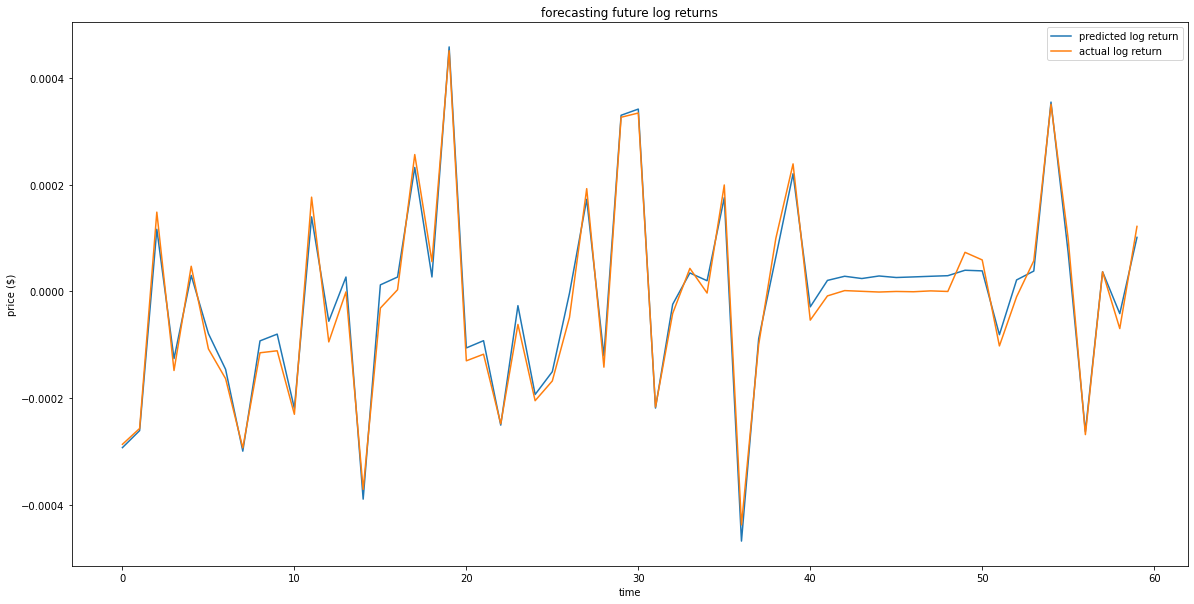

In [36]:
plt.plot(y_pred[:60], label="predicted log return")
plt.plot(y_test.to_numpy()[:60], label="actual log return")
plt.title('forecasting future log returns')
plt.ylabel('price ($)')
plt.xlabel('time')
plt.legend(loc='upper right')
plt.show()